In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
A = np.load("data.npy")

1.1. Realice la SVD de la matriz A, y  ́usela para proyectar las imagenes sobre
el espacio lineal de dimension k que mejor las aproxima. Use valores de
k = 1, 5, 10, 25, 50 y 72. Elija un par de rostros, y para cada valor de k,
muestre los “rostros aproximados”(correspondientes a las proyecciones) y
comparelos con los originales.

In [13]:
# Función para hacer la SVD truncada
def truncated_svd(A, k):
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    return U[:, :k], S[:k], Vt[:k, :]

# Funcion para reconstruir la SVD truncada a rango k
def aprox_rango_k(A, k):
    U, S, V = truncated_svd(A, k)
    A_k = U @ np.diag(S) @ V
    return A_k

# Funcion para generar la imagen i truncada a K y comparar con la imagen original
def comparar_aproximacion(A, A_k, i, k):
    original = imagen2 = A[i].reshape((241,181))
    aproximacion = A_k[i].reshape((241, 181))

    plt.figure(figsize=(4, 3))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(f"Original")
    plt.axis('off')

    # Imagen aproximada
    plt.subplot(1, 2, 2)
    plt.imshow(aproximacion, cmap='gray')
    plt.title(f"Aproximación k = {k}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

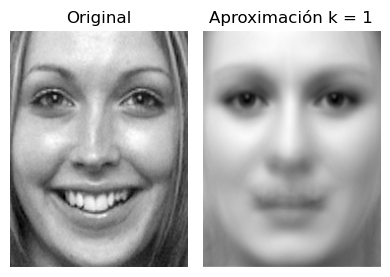

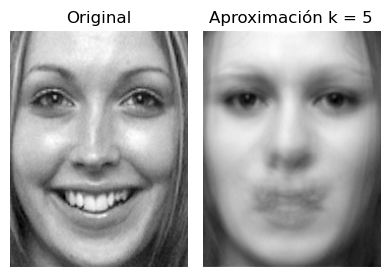

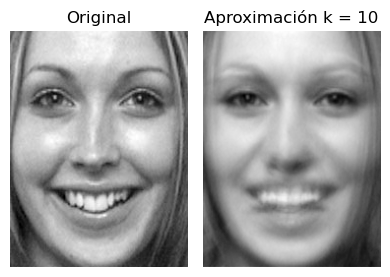

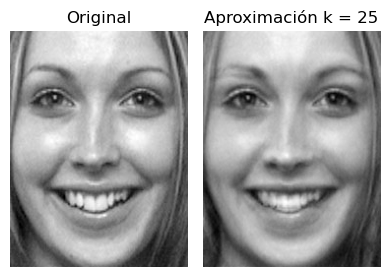

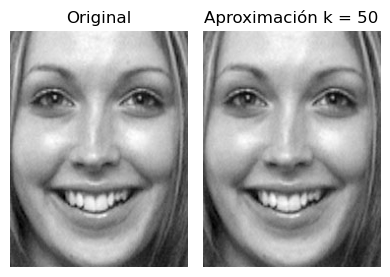

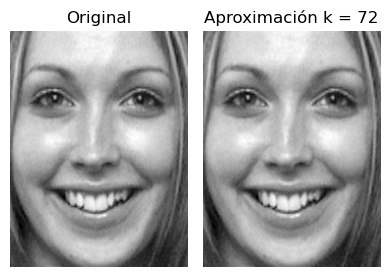

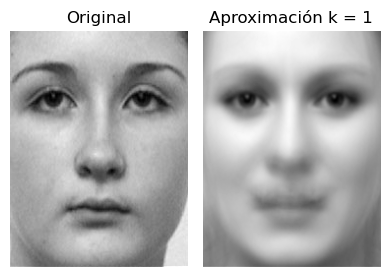

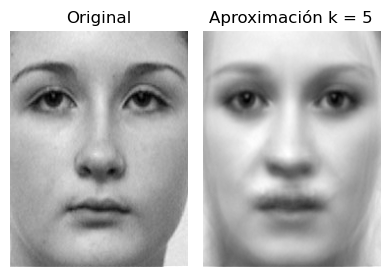

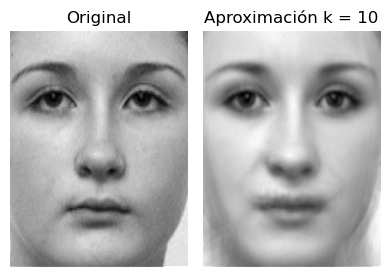

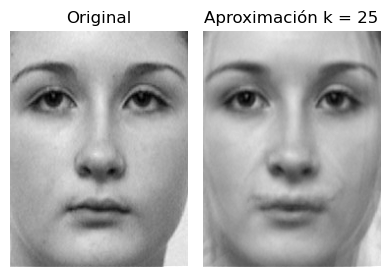

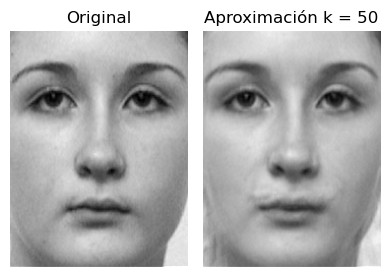

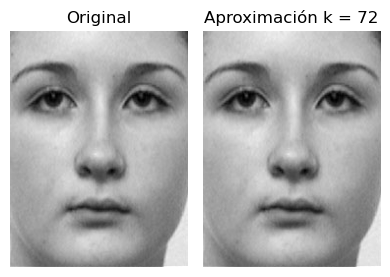

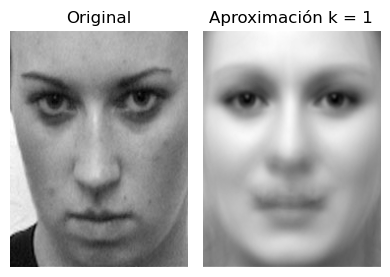

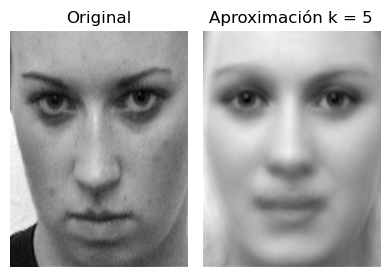

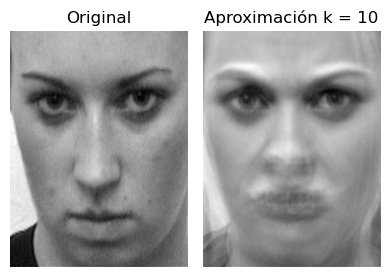

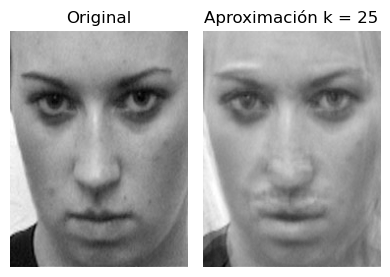

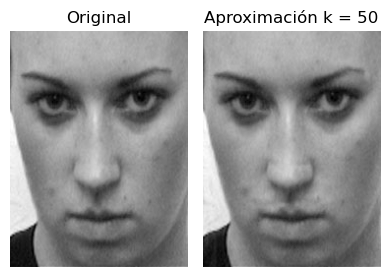

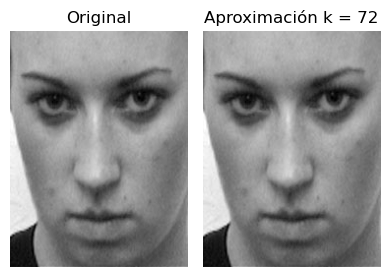

In [15]:
ids = [3, 22, 60] # imagenes de muestra 
ks = [1, 5, 10, 25, 50, 72] # valores de K pedidos

for i in ids: 
    for k in ks:
        A_k = aprox_rango_k(A, k)
        comparar_aproximacion(A, A_k, i, k)

1.2. Realice PCA a la matriz A (es decir, el paso anterior pero centrando los datos previamente), y  ́usela para proyectar las imagenes sobre el espacio afin
de dimension k que mejor las aproxima. Use valores de k = 1, 5, 10, 25, 50
y 72. Nuevamente, para cada k, muestre un par de “rostros aproximados”
y comparelos con los originales. Recuerde descentrar las imagenes una vez
proyectadas.

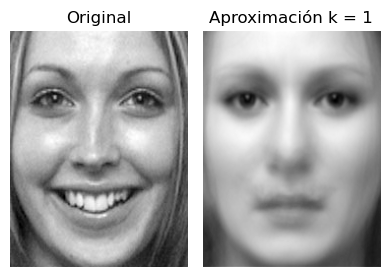

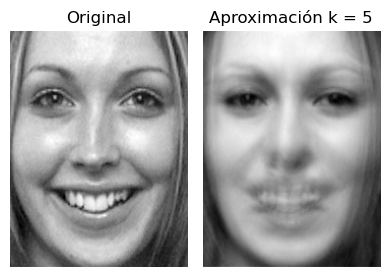

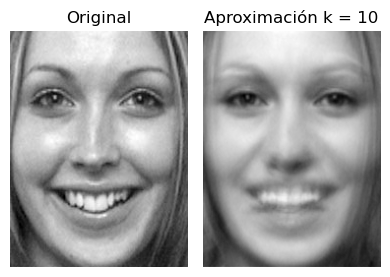

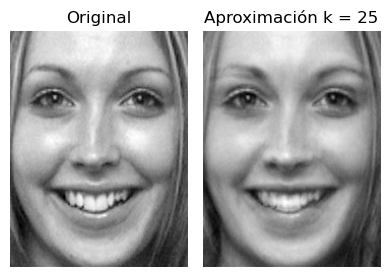

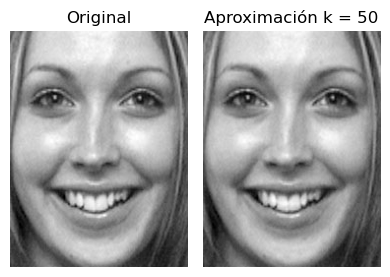

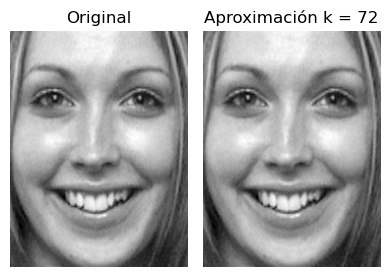

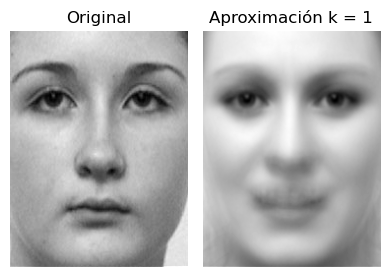

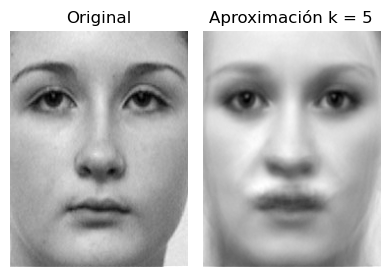

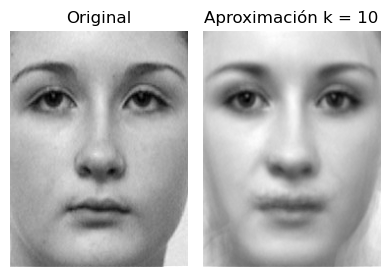

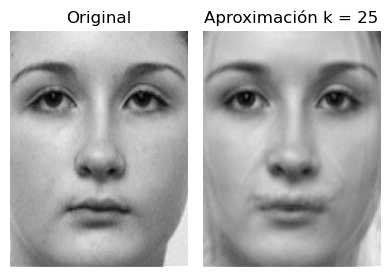

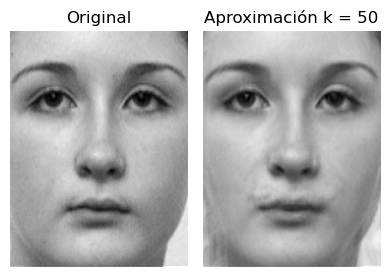

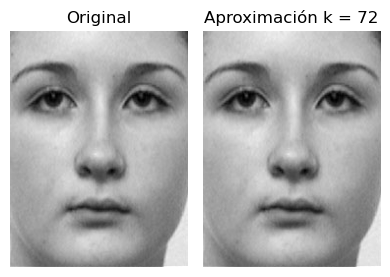

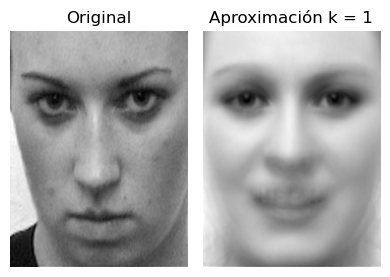

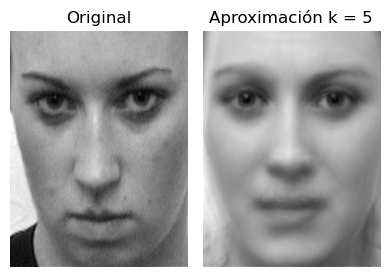

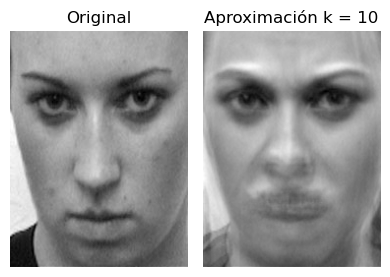

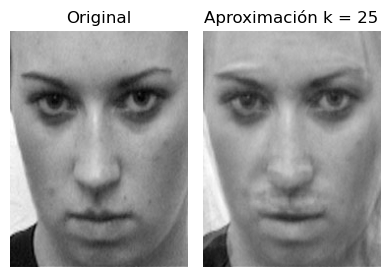

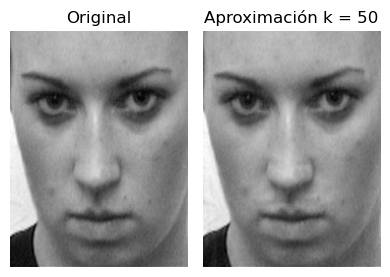

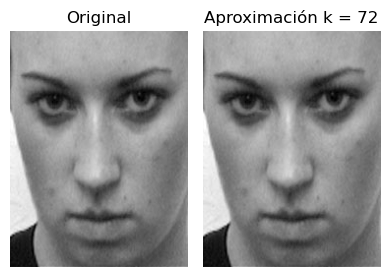

In [149]:
# Usamos las mismas imagenes que en el primer apartado
ids = [3, 22, 60] # imagenes de muestra 
ks = [1, 5, 10, 25, 50, 72] # valores de K pedidos

# Centramos los datos
media_A = A.mean(axis=0)       # Calculamos el promedio de cada columna de la matriz A    
A_centrada = A - media_A      # Centramos la matriz restandole la media

for i in ids: 
    for k in ks:
        A_k = aprox_rango_k(A_centrada, k) # se realiza la aproximacion usando la matriz centrada
        A_descentrada = A_k + media_A # se descentra la matriz tras aproximarla a rango k, sumandole de nuevo la media
        comparar_aproximacion(A, A_descentrada, i, k)

1.3. Muestre una tabla donde se compare el error cuadratico medio de las aproximaciones encontradas en los items anteriores (es decir, para los valores
de k mencionados, y tanto para el caso centrado como el no centrado).

donde A(k) contiene las proyecciones de las imagenes como filas, y m es la
cantidad de maagenes. Comente.

In [71]:
# Funcion que calculo el error cuadratico de una matriz
def error_cuadratico(A, A_k):
    error_cuadrado = (A - A_k) ** 2
    suma = np.sum(error_cuadrado)
    error = suma / len(A) # cantidad de imagenes que tiene el archivo
    return error

In [73]:
ErroresCuadraticos_SVD = []
ErroresCuadraticos_PCA = []

ks = [1, 5, 10, 25, 50, 72] # valores de K pedidos

for k in ks:
    #SVD (no centrado)
    A_k = aprox_rango_k(A, k)

    #PCA (centrado)
    A_k2 = aprox_rango_k(A_centrada, k) # se realiza la aproximacion usando la matriz centrada
    A_descentrada = A_k2 + media # se descentra la matriz tras aproximarla a rango k, sumandole de nuevo la media

    # Guardar datos de errores
    ErroresCuadraticos_SVD.append(error_cuadratico(A, A_k))
    ErroresCuadraticos_PCA.append(error_cuadratico(A, A_descentrada))

In [74]:
# Tabla para comparar los valores obtenidos con SVD y PCA en cada valor k
df_error = pd.DataFrame({"k": ks, "ERROR SVD": ErroresCuadraticos_SVD, "ERROR PCA": ErroresCuadraticos_PCA})
df_error.round(2)

,k,ERROR SVD,ERROR PCA
0,1,698.34,591.25
1,5,364.18,346.60
2,10,235.78,230.06
3,25,94.59,91.57
4,50,23.95,22.63
5,72,0.00,0.00


1.4. Visualize los datos como puntos, proyectandolos en sus dos primeras componentes principales. Coloree los rostros correspondientes a una misma
persona de un mismo color, y use colores distintos para rostros de personas distintas. Para mayor claridad, muestre los datos correspondientes a
las dos primeras personas

In [151]:
# Calculamos las proyecciones de la matriz centrada en el espacio de componentes principales, similar al la SVD truncada
U, S, Vh = np.linalg.svd(A_centrada, full_matrices=False)       
proyeccion = U @ np.diag(S)   

In [152]:
# Funcion que grafica la proyeccion comparando 2 componentes, para visualizar x,y se debe ingresar x-1,y-1
def graficar_proyeccion_componentes(proyeccion, componente1, componente2):
    x = proyeccion[:12, componente1]  
    y = proyeccion[:12, componente2]

    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, c=(["red"]*6 + ["black"]*6))
    plt.title(f"Componentes {componente1 + 1} y {componente2 + 1}", fontsize=18)
    plt.grid(True)
    plt.show()

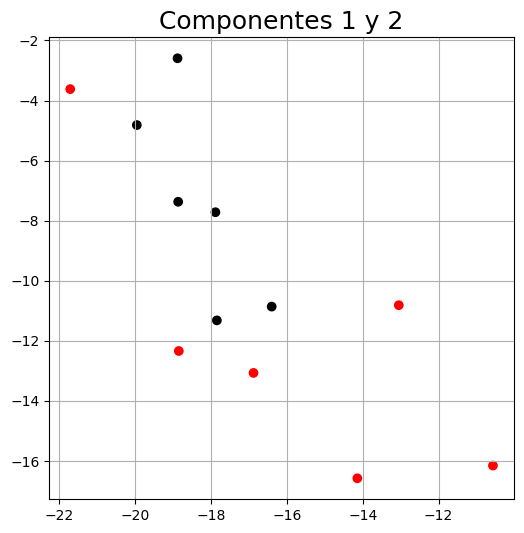

In [155]:
graficar_proyeccion_componentes(proyeccion, 0, 1)   # Componentes 1 y 2

1.5. Repita el paso anterior, proyectando ahora sobre la tercera y cuarta componentes principales, y luego sobre la quinta y sexta. Comente. En particular, responda: ¿que par de componentes (1 y 2 vs 3 y 4 vs 5 y 6) parece
ser mas relevante para separar a las 2 primeras personas? ¿Como explica
esto?

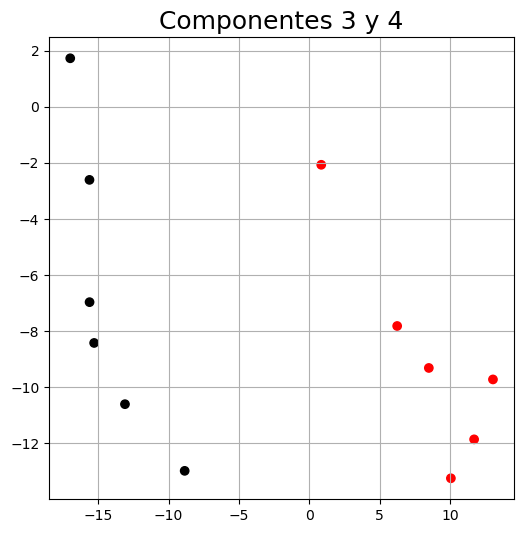

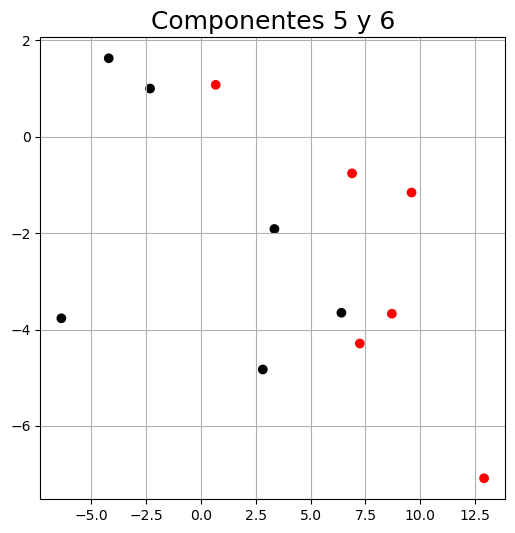

In [142]:
graficar_proyeccion_componentes(proyeccion, 2, 3)   # Componentes 3 y 4
graficar_proyeccion_componentes(proyeccion, 4, 5)   # Componentes 5 y 6

In [ ]:
# me parece que las componentes 3 y 4

1.6. La matriz test.npy contiene seis imagenes, tres de ellas correspondientes
a rostros y tres de ellas correspondientes a otros objetos cotidianos. Visualice las seis imagenes. Luego, aproximelas proyectandolas sobre las 20 primeras componentes principales (de la misma matriz A anterior con los
72 rostros), y visualice esta aproximacion. Comente sobre la calidad de
las aproximaciones obtenidas. ¿Que imagenes se aproximan bien sobre las
componentes principales de A? ¿Por que?

In [161]:
B = np.load("test.npy")

In [180]:
# Centramos los datos
media_A = A.mean(axis=0)       # Calculamos el promedio de cada columna de la matriz A    
A_centrada = A - media_A      # Centramos la matriz restandole la media
B_centrada = B - media_A

U, S, Vh = truncated_svd(A_centrada, k=20)

proyeccion_B = B_centrada @ Vh.T     # Proyecta las imágenes de test con los 20 componentes principales   
reconstruccion_B = proyeccion_B @ Vh        # Reconstruimos las imágenes proyectadas en el espacio original
aproximacion = reconstruccion_B + media_A        # Se descentra la reconstruccion 

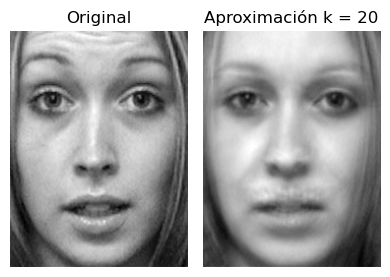

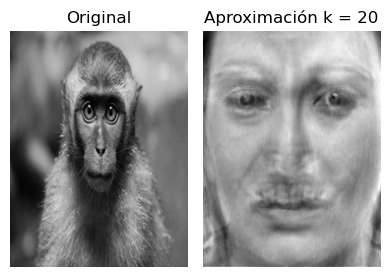

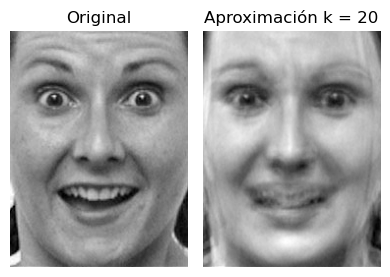

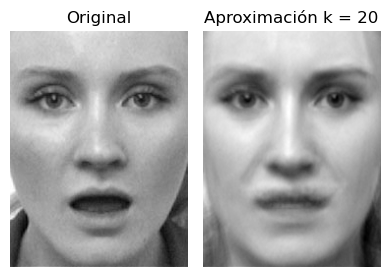

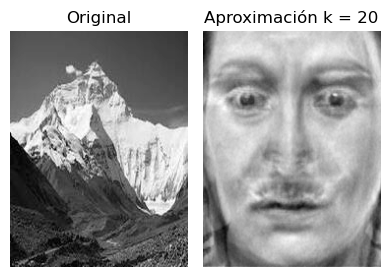

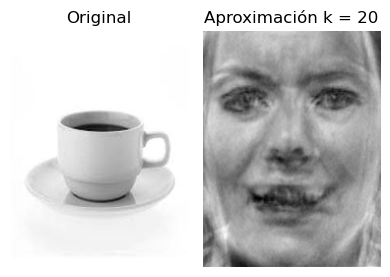

In [181]:
for i in range(6):
    comparar_aproximacion(B, aproximacion , i, 20)   